# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений.
Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное


       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333  


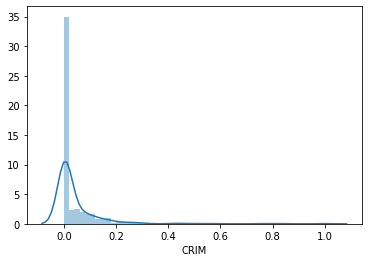

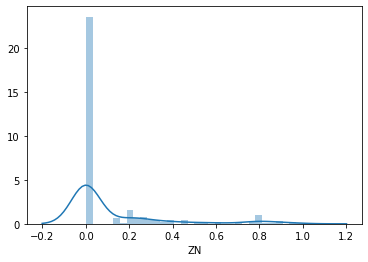

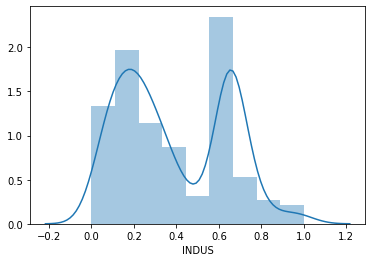

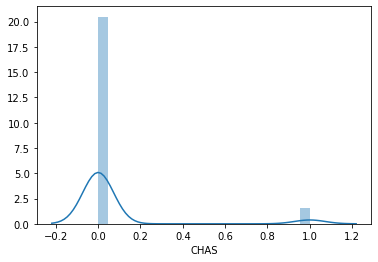

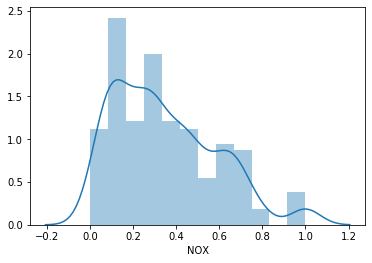

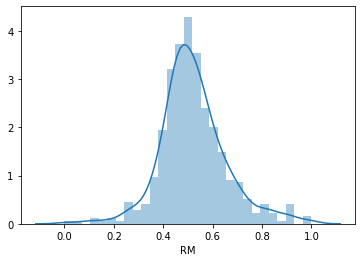

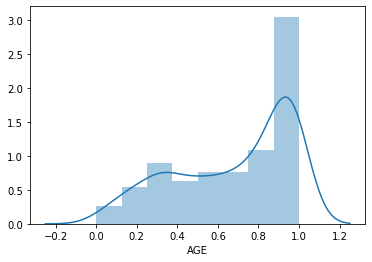

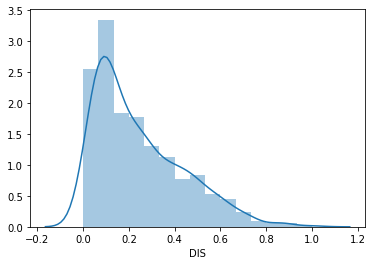

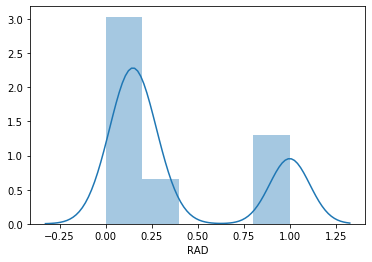

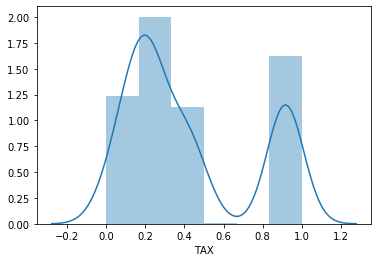

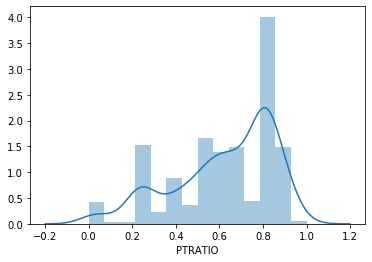

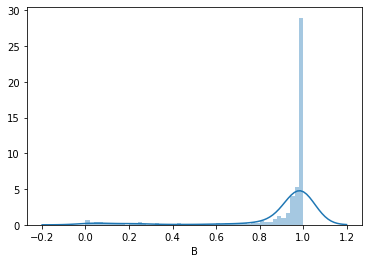

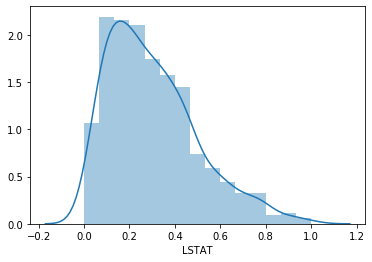

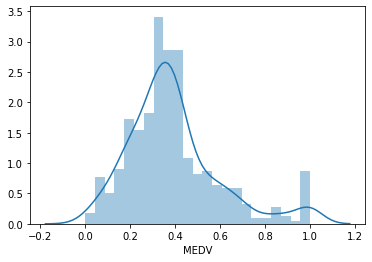

In [3]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

np_scaled = min_max_scaler.fit_transform(data[cols] )
df_norm = pd.DataFrame(np_scaled, columns=cols)
print(df_norm[:5])

for col in cols:
    sns.distplot(df_norm[col])
    plt.show()


#'CRIM', биноминальное
# 'ZN', нормальное
# 'RM', нормальное

#большинство нормальных


In [4]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

   Positive affect  Generosity  Log of GDP\nper capita  SD of Ladder  \
0         0.259740    0.298701                0.139073      0.019355   
1         0.149351    0.136364                0.086093      0.077419   
2         0.097403    0.064935                0.039735      0.045161   
3         0.012987    0.012987                0.092715      0.051613   
4         0.071429    0.038961                0.072848      0.000000   

   Corruption  Negative affect  Healthy life\nexpectancy    Ladder   Freedom  \
0    0.020408         0.058442                  0.174497  0.000000  0.025974   
1    0.013605         0.162338                  0.147651  0.006452  0.032468   
2    0.047619         0.181818                  0.073826  0.012903  0.012987   
3    0.299320         0.012987                  0.080537  0.019355  0.038961   
4    0.074830         0.155844                  0.114094  0.025806  0.116883   

   Social support  
0        0.006494  
1        0.019481  
2        0.012987  
3     

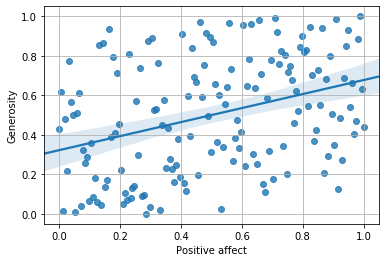

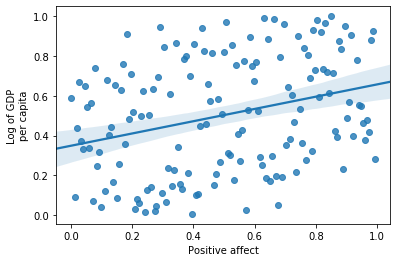

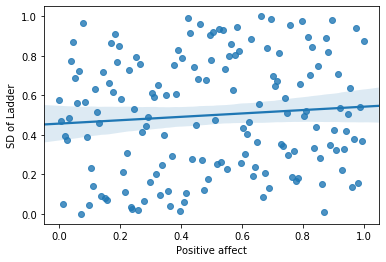

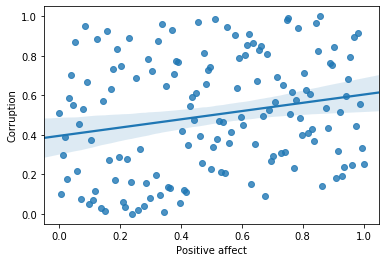

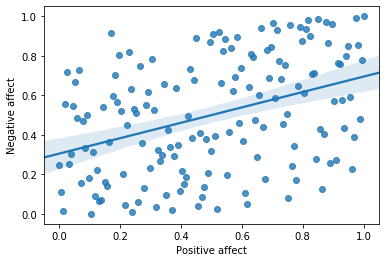

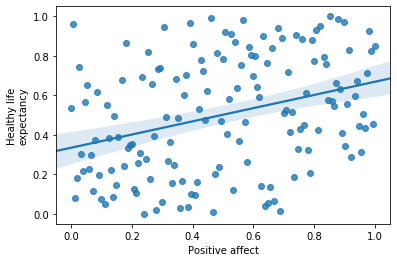

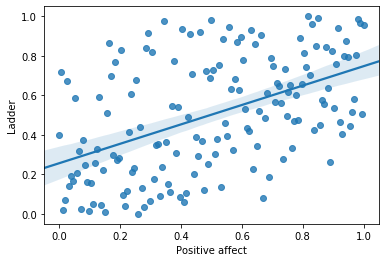

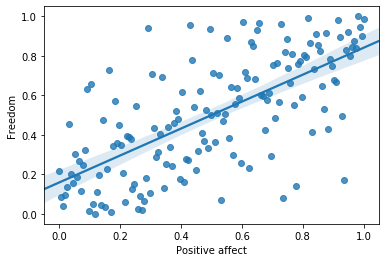

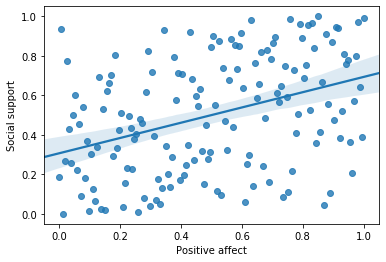

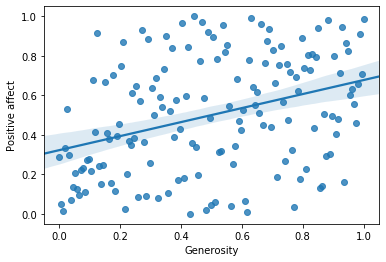

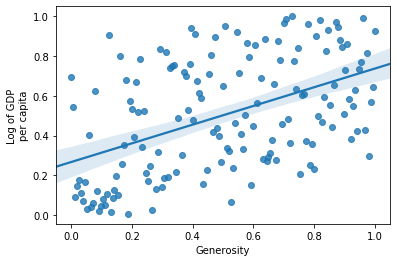

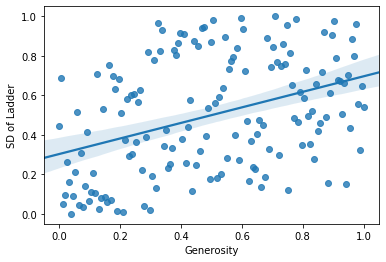

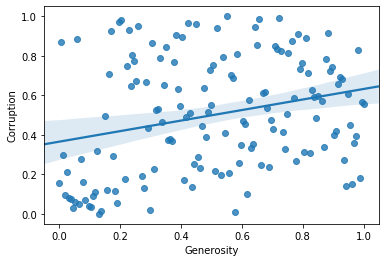

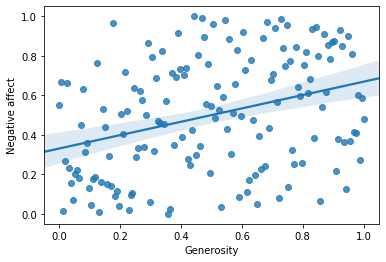

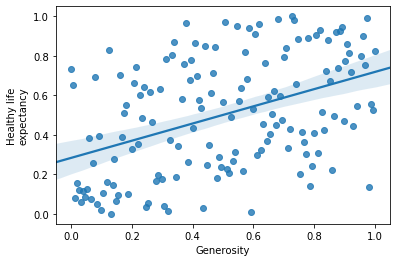

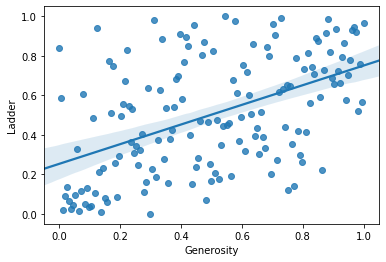

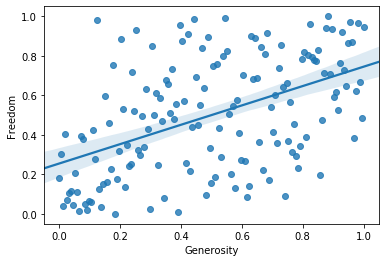

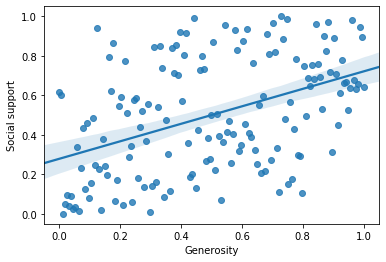

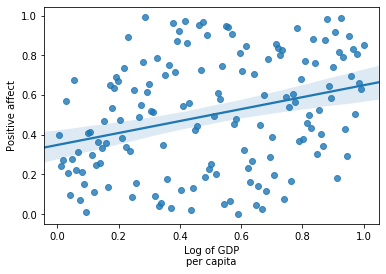

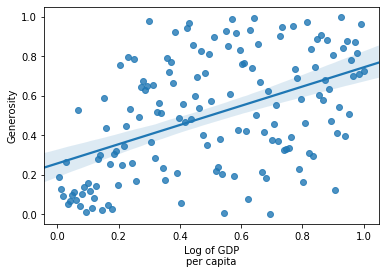

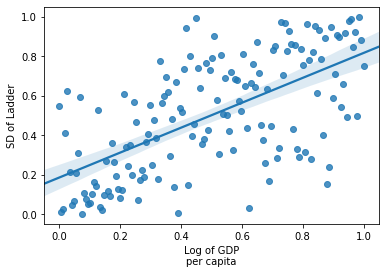

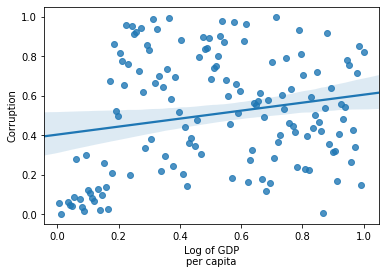

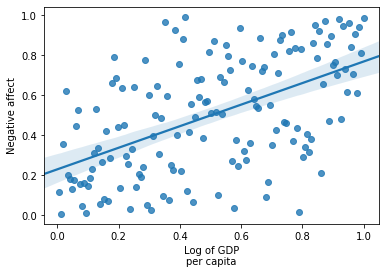

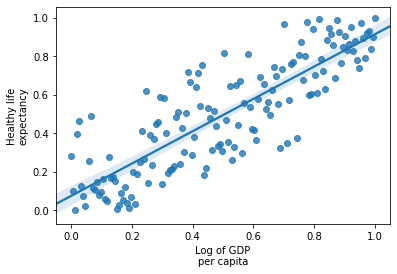

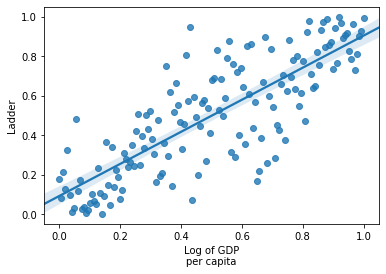

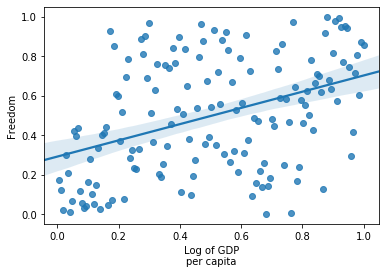

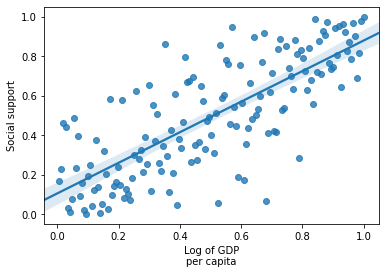

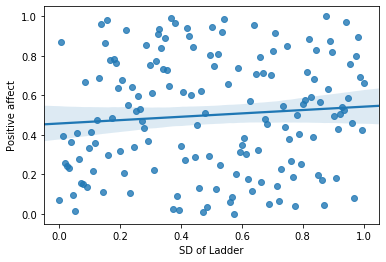

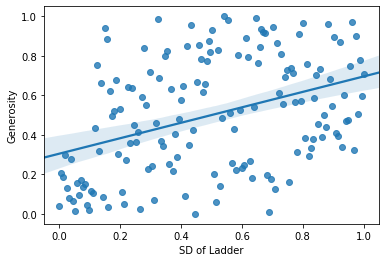

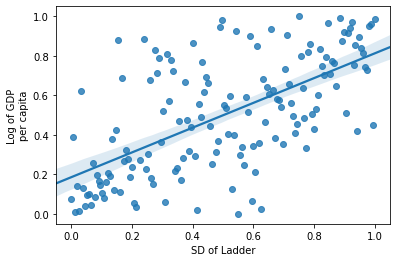

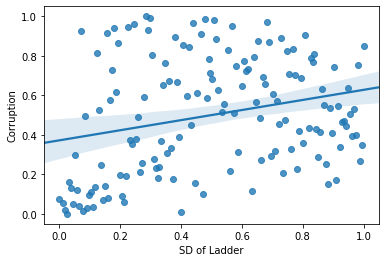

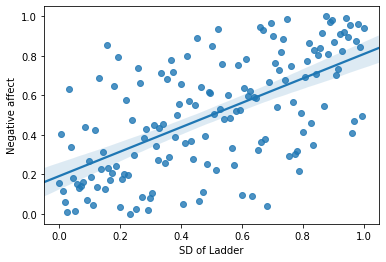

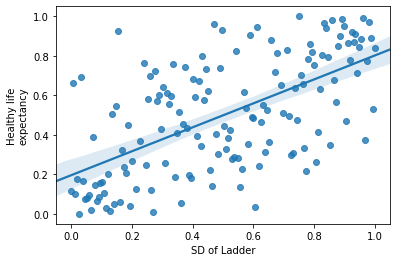

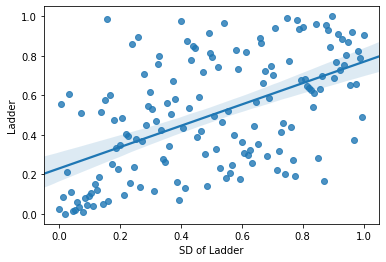

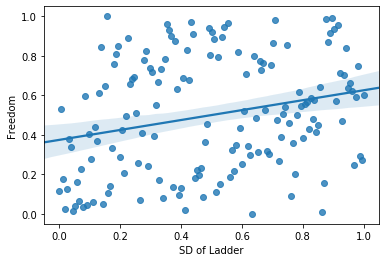

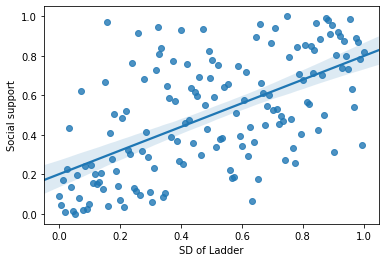

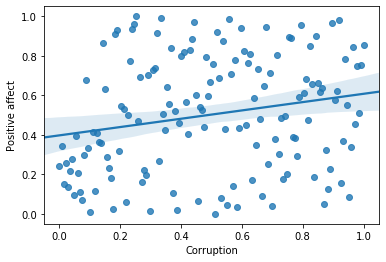

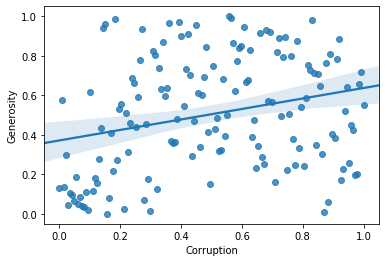

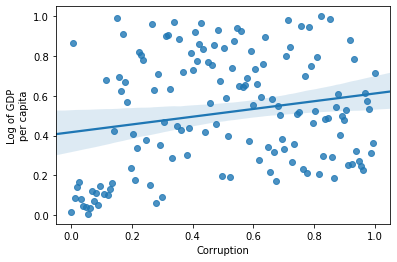

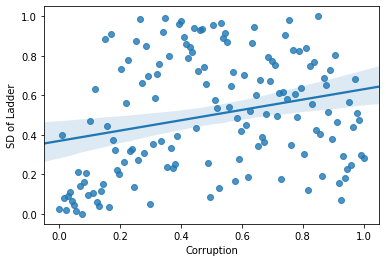

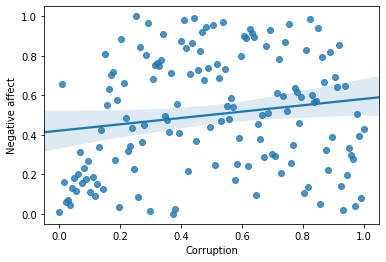

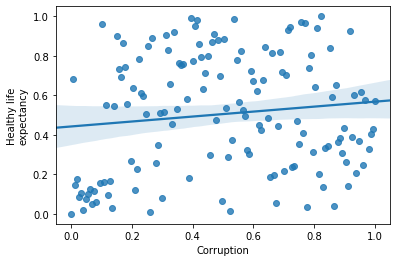

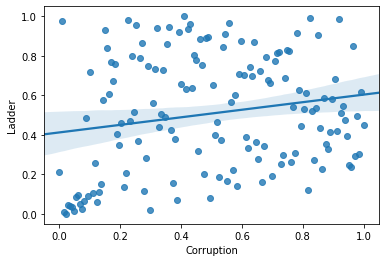

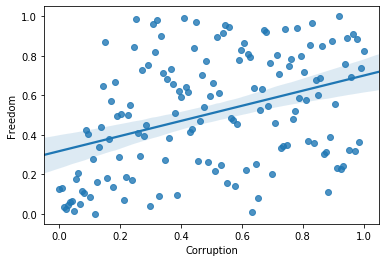

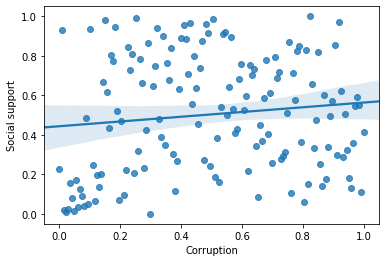

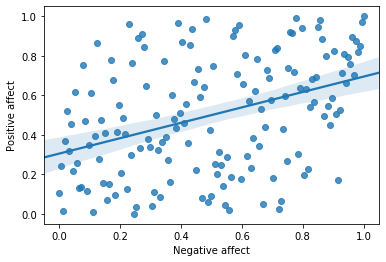

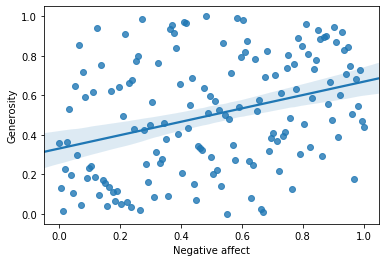

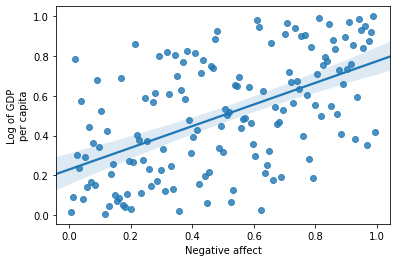

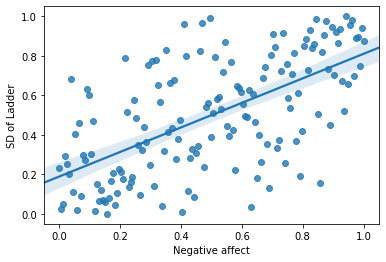

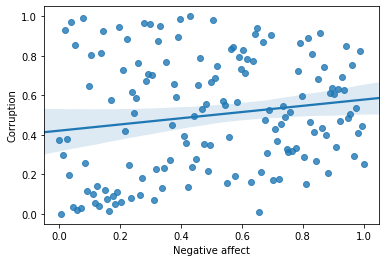

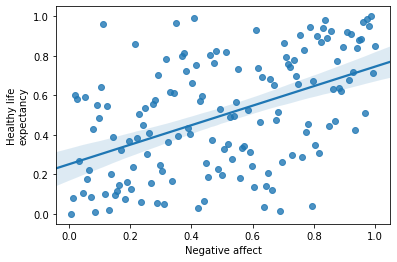

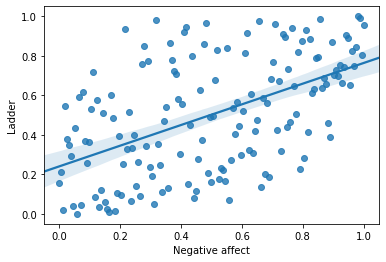

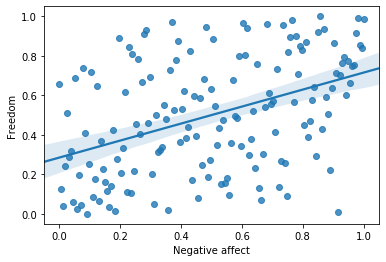

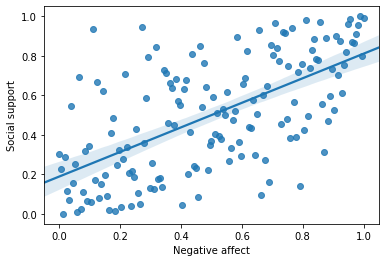

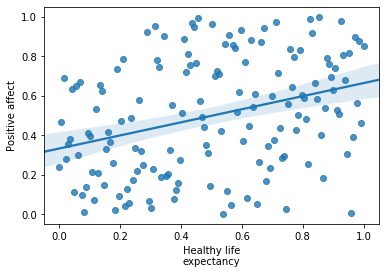

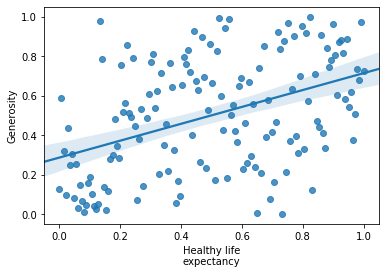

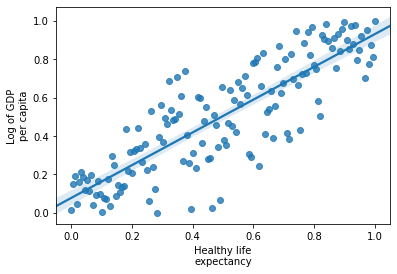

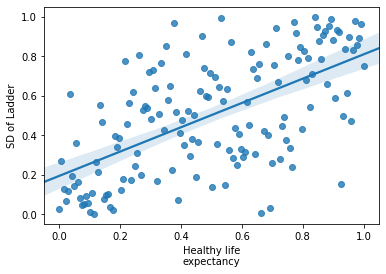

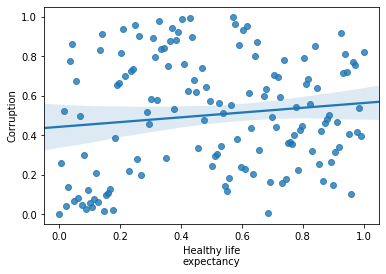

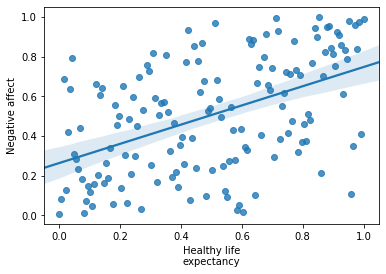

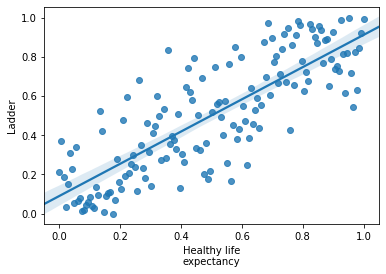

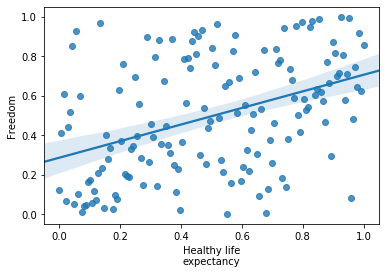

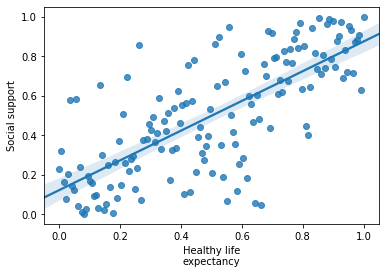

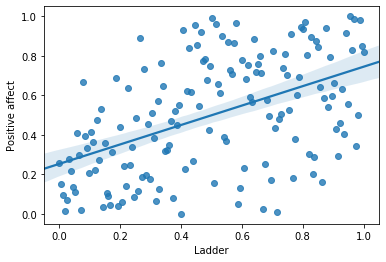

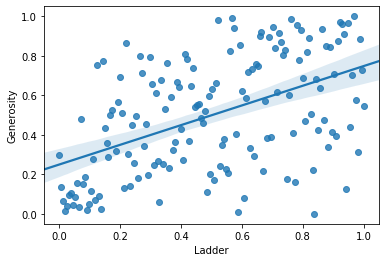

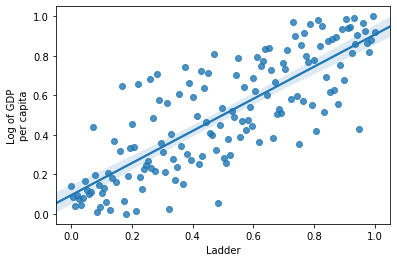

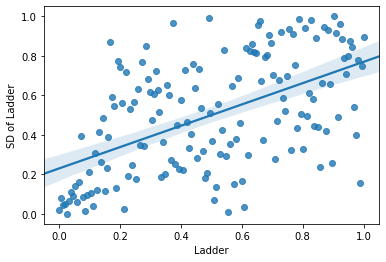

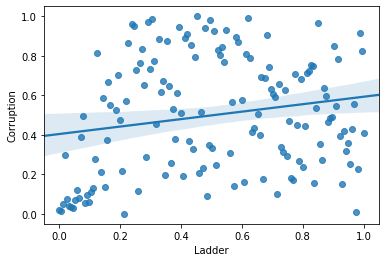

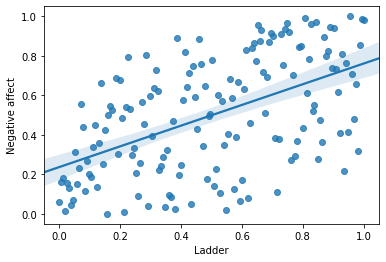

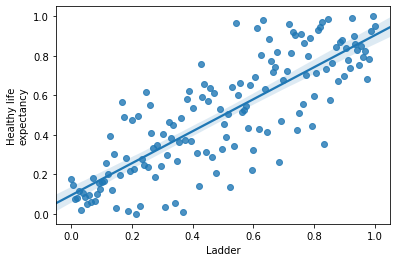

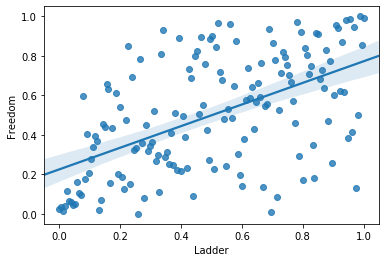

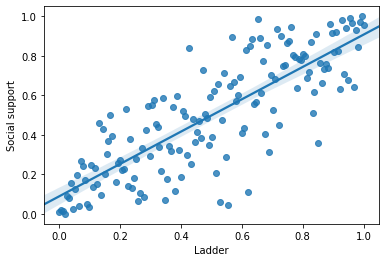

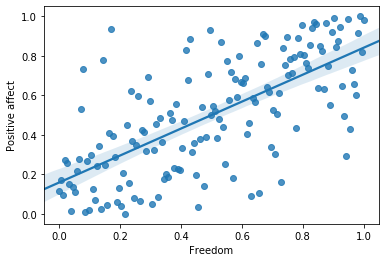

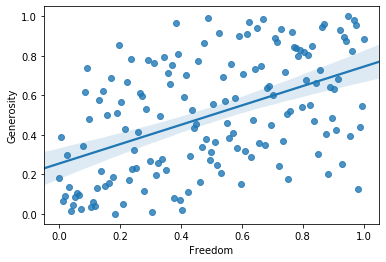

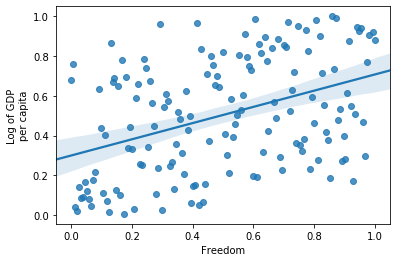

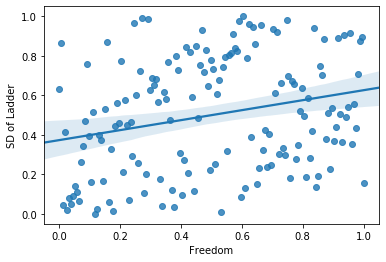

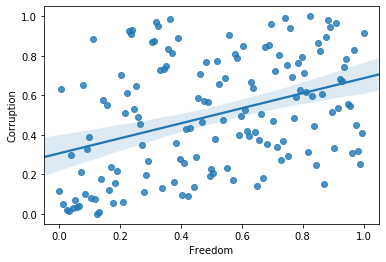

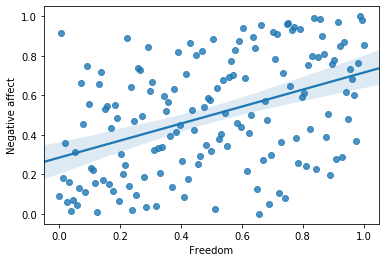

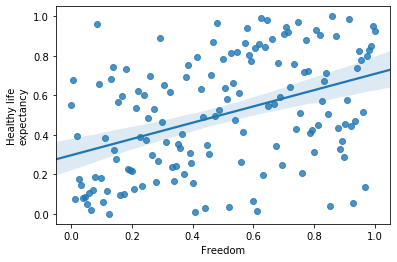

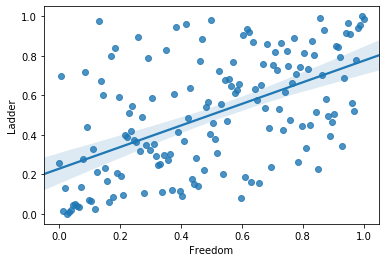

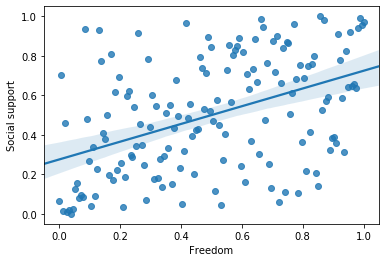

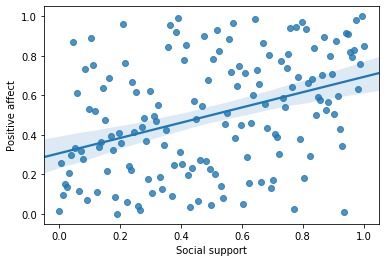

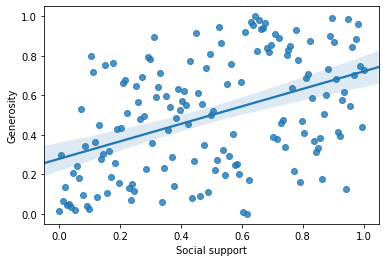

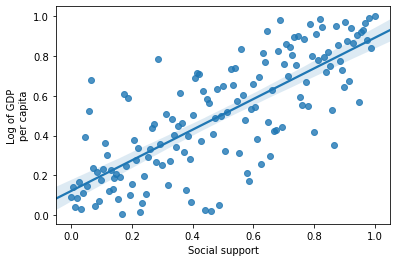

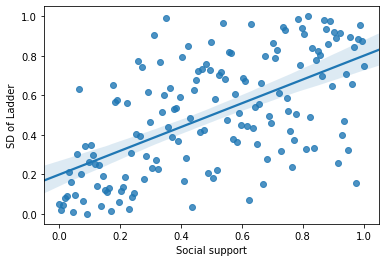

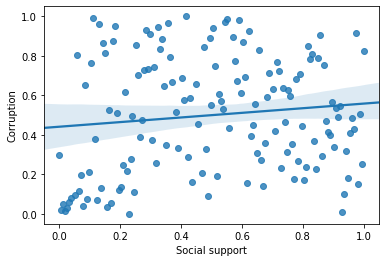

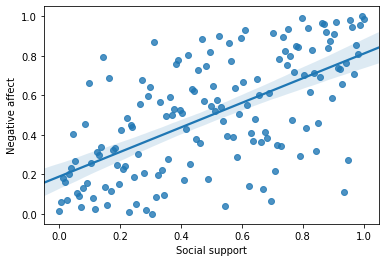

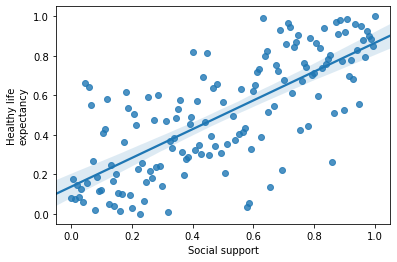

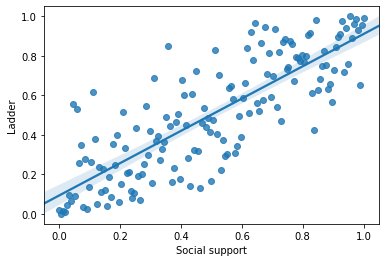

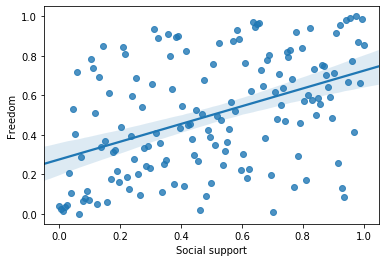

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

cols_new = list(set(df.columns) - {'Country (region)'})

np_scaled = min_max_scaler.fit_transform(df[cols_new] )
df_norm = pd.DataFrame(np_scaled, columns=cols_new)
print(df_norm[:5])

plt.grid(True)
for col in cols_new:
    for y_col in cols_new:
        if col != y_col:
            sns.regplot(x=col, y=y_col, data=df_norm, fit_reg=True)
            plt.xlabel(col)
            plt.ylabel(y_col)
            plt.show()

In [6]:
Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 



SyntaxError: invalid syntax (<ipython-input-6-ad3fd9d70659>, line 1)

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()
X = data.iloc[:, [4,6,7,8]]
X.head()
np.cov(X)
print(np.shape(np.cov(X)))

Сколько в данной таблице отсутствующих значений? Написать ответ. 
Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.


In [ ]:
X.dropna()
#Было 155, стало 148 после дропа

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [ ]:
data['Country (region)']
len(set(data['Country (region)']))

#в выборке 156 стран
# нельзя сказать, что это проблема классификации - все просто, один класс - одно значение, чего тут классифицировать

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

In [ ]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data)
plt.show()
#похожи те страны, что по диагонали

In [ ]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете
# проблемы: yustiks@gmail.com

url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data_n=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names=["Sepal length", "Sepal width", 
                                                                    "Petal length", "Petal width", 'species'])
data_n.head()
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data_n, hue='species')
plt.show()

#код не работал, изменила название датасета и загрузиа его снова, заработал

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?



In [ ]:
X = data_n.iloc[:,:4]
X.corr()
np.corrcoef(X.T)
standardized = (X - X.mean()) / X.std()
np.corrcoef(standardized.T)




**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками.
 Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, 
 которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. 
 Можно ли сказать, что данная прямая является собственным вектором? 
 При проецировании данных на эту прямую разброс данных максимален?
 
 
 # да, можно
 # нет, кажется, минимален

In [ ]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler
import statistics

df = df.dropna()
Ladder = df['Ladder']
Generosity = df['Generosity']
mean1 = statistics.mean(Ladder)
Ladder -= mean1
mean2 = statistics.mean(Generosity)
Generosity -= mean2
Y = np.vstack((Ladder, Generosity)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(Ladder, Generosity, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generosity')
    plt.plot([mean1, mean1+w[i]*v[:,i][0]], [mean2, mean2 +w[i] * v[:,i][1]],color='red', linewidth=10)
    plt.show()


# Дискретное распределение случайной величины


Напишите код для моделирования 10 подбрасываний игрального кубика. 
Начертите диаграму histogram. Какое это распределение?

Trials = 10 times
Mean = 3.7
Standard deviation = 1.7916472867168918


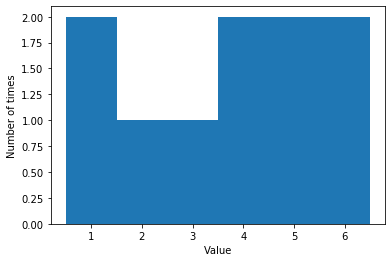

In [11]:
import pylab
import random

number_of_trials = 10
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(random.randint( 1,6))

mean=pylab.mean(list_of_values)
std=pylab.std(list_of_values)
print("Trials =", number_of_trials, "times")
print("Mean =", mean)
print("Standard deviation =", std)

pylab.hist(list_of_values,bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.show()

#равномерное распределение

Напишите код для моделирования 1000 подбрасываний игрального кубика. 
Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?




Trials = 1000 times.
Mean = 3.541
Standard deviation = 1.7240414728190272


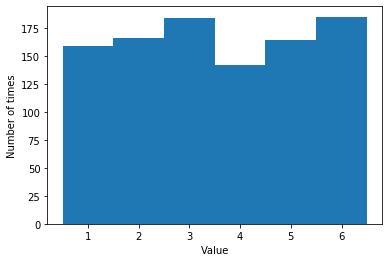

In [15]:
import pylab
import random

number_of_trials =1000
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(random.randint( 1,6))

print ("Trials =", number_of_trials, "times.")
print ("Mean =", pylab.mean(list_of_values))
print ("Standard deviation =", pylab.std(list_of_values))

pylab.hist(list_of_values, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.show()

#выглядит все равно как равномерное
# как применить - подбрасывать несколько кубиков, и выпавшие на каждом кубике значиния и будут независимые случайные величины
# и это должно стремиться к нормальном распределению